# Homework Assignment 1
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

*For* this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package. 

**Please note:** You need to answer only the questions that match your ID first digit.

# 1. Babies Names Dataset (35pt)

## Preperations:

In [ ]:
! pip install kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
# download the dataset
! kaggle datasets download kaggle/us-baby-names
! unzip /content/us-baby-names.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 172M/173M [00:01<00:00, 128MB/s]
100% 173M/173M [00:01<00:00, 115MB/s]
Archive:  /content/us-baby-names.zip
  inflating: NationalNames.csv       
  inflating: NationalReadMe.pdf      
  inflating: StateNames.csv          
  inflating: StateReadMe.pdf         
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
# IMPORTS
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import time
from typing import List, Tuple, Dict

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset** ](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv) (use NationalNames.csv) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

In [ ]:
def df_to_db(df: pd.DataFrame, db_name: str, table_name: str, batch_size: int = 0):
  conn = sql.connect(db_name)
  if batch_size:
    df.to_sql(table_name, conn, if_exists='replace', chunksize=batch_size)
  else:
    df.to_sql(table_name, conn, if_exists='replace')
  conn.close()

In [ ]:
# BONUS IS IMPLEMENTED WITHIN THE FUNCITON (PARAMETER NAMED 'batch_size')
db_name = 'namesDB.db'
batch_size = 500

national_names_df = pd.read_csv('NationalNames.csv')
national_names_df['State'] = None
national_names_table_name = 'national_names'

names_by_states_df = pd.read_csv('StateNames.csv')
names_by_states_table_name = 'state_names'

df_to_db(national_names_df, db_name, national_names_table_name, batch_size=batch_size)
df_to_db(names_by_states_df, db_name, names_by_states_table_name, batch_size=batch_size)

**Task 2 (for everyone):** Write a query that returns the statistics for the name Mary (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

In [ ]:
def get_statistics_on_name(db_cursor, name_of_table: str, name_to_get_statistics: str = 'Mary'):
  # STATISTICS 1: amount of name's
  query_as_str = f"""
  SELECT SUM(Count)
  FROM {name_of_table}
  WHERE Name=?
  """
  query_params = (name_to_get_statistics,)
  query_ans = db_cursor.execute(query_as_str, query_params).fetchone()
  name_count = query_ans[0]
  
  # STATISTICS 2: average of name's about year
  query_as_str = f"""
  SELECT AVG(Count)
  FROM {name_of_table}
  WHERE Name=?
  GROUP BY Year
  """
  query_params = (name_to_get_statistics,)
  query_ans = db_cursor.execute(query_as_str, query_params).fetchone()
  average_about_year = query_ans[0]
  
  # STATISTICS 3: amount of female name, amout of male name
  query_as_str = f"""
  SELECT SUM(Count), Gender
  FROM {name_of_table}
  WHERE Name=? 
  GROUP BY Gender 
  """
  query_params = (name_to_get_statistics,)
  query_ans = db_cursor.execute(query_as_str, query_params).fetchall()
  female_count, male_count = query_ans[0][0], query_ans[1][0]
  
  return {
      f'Total {name_to_get_statistics}': name_count,
      f'Average {name_to_get_statistics} Per Year': average_about_year,
      f'Total Male {name_to_get_statistics}':male_count,
      f'Total Female {name_to_get_statistics}':female_count
  }

In [ ]:
conn.close()

In [ ]:
# no index
conn = sql.connect(db_name)
db_cursor = conn.cursor()
db_cursor.execute(f'DROP INDEX IF EXISTS name_idx;')
start = time.time()
print(get_statistics_on_name(db_cursor, names_by_states_table_name))
time_with_no_index = time.time() - start
conn.close()
# with index
conn = sql.connect(db_name)
db_cursor = conn.cursor()
db_cursor.execute(f'CREATE INDEX name_idx ON {names_by_states_table_name} (Name)')
start = time.time()
print(get_statistics_on_name(db_cursor, names_by_states_table_name))
time_with_index = time.time() - start
conn.close()
print(f'Improvent factor with index: {time_with_no_index/time_with_index}')

{'Total Mary': 3740495, 'Average Mary Per Year': 388.2542372881356, 'Total Male Mary': 9639, 'Total Female Mary': 3730856}
{'Total Mary': 3740495, 'Average Mary Per Year': 388.2542372881356, 'Total Male Mary': 9639, 'Total Female Mary': 3730856}
Improvent factor with index: 29.64407129654346


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 4 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "307963538"
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 3


***Question 1:*** Write a function that returns how many babies were born in a given state in a given year.
Use it to calculate the number of babies born in TX in 1986 (10pt)

***Question 2:*** Write a function that returns how many female babies were born between a given range of years.
Use it to calculate how many babies were born between 1988 and 1995  (10pt)

**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in Wasington in 1987 (10pt)

In [ ]:
def most_common_name_in_country_by_gender_by_year(db_cursor, name_of_table:str, gender: str, year: str, state: str):
  query_as_str = f"""
  SELECT Count, Name
  FROM {name_of_table}
  WHERE State=? AND Gender=? AND Year=?
  ORDER BY Count DESC
  """
  query_params = (state, 'F', year,)
  query_ans = db_cursor.execute(query_as_str, query_params).fetchone()
  most_common, amount = query_ans[1], query_ans[0] 
  return most_common, amount

In [ ]:
conn = sql.connect(db_name)
db_cursor = conn.cursor()
most_common, amount = most_common_name_in_country_by_gender_by_year(db_cursor, names_by_states_table_name, 'F', '1987','WA')
conn.close()
print(f'Most common is: {most_common} with {amount}#')

Most common is: Jessica with 885#


**Question 4:** Write a function that returns how many male babies named _Robert where born in a given state in a given year. Use it to find the state in which the highest number of babies _Robert_ where born in 2010 (10pt)

**Question (for everyone):** For the state of CA write code that calculates the second most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

In [ ]:
def get_min_decade_start(db_cursor, name_of_table):
  query_as_str = f"""
  SELECT MIN(Year)
  FROM {name_of_table}
  """
  
  query_ans = db_cursor.execute(query_as_str).fetchone()
  
  return (int(query_ans[0])//10) * 10

def get_max_decade_start(db_cursor, name_of_table):
  query_as_str = f"""
  SELECT MAX(Year)
  FROM {name_of_table}
  """
  
  query_ans = db_cursor.execute(query_as_str).fetchone()
  
  return (int(query_ans[0])//10) * 10 + 10

def sescond_most_popular_by_decade(db_cursor, name_of_table: str, state: str = 'CA', gender: str = 'F'):
  min_decade, max_decade = get_min_decade_start(db_cursor, name_of_table), get_max_decade_start(db_cursor, name_of_table)

  second_most_common_by_decade = {}

  for start_of_decade in range(min_decade, max_decade+1, 10):
    end_of_decade = start_of_decade + 9
    
    decade_key = f'{start_of_decade}-{end_of_decade}'

    query_as_str = f"""
    SELECT SUM(Count), Name
    FROM {name_of_table}
    WHERE State=? AND Gender=? AND Year BETWEEN ? AND ?
    GROUP BY Name
    ORDER BY SUM(Count) DESC
    """
    query_params = (state, gender, start_of_decade, end_of_decade,)
    query_ans = db_cursor.execute(query_as_str, query_params).fetchall()

    if len(query_ans) < 2:
      continue
    second_most_common_by_decade[decade_key] = query_ans[1]
  
  return second_most_common_by_decade


In [ ]:
conn = sql.connect(db_name)
db_cursor = conn.cursor()
second_most_common_by_decade = sescond_most_popular_by_decade(db_cursor, names_by_states_table_name, 'CA', 'F')
conn.close()
print(second_most_common_by_decade)

{'1910-1919': (5940, 'Dorothy'), '1920-1929': (11645, 'Betty'), '1930-1939': (15447, 'Barbara'), '1940-1949': (28384, 'Mary'), '1950-1959': (35635, 'Susan'), '1960-1969': (24393, 'Michelle'), '1970-1979': (26577, 'Michelle'), '1980-1989': (49348, 'Jennifer'), '1990-1999': (33086, 'Ashley'), '2000-2009': (25457, 'Ashley'), '2010-2019': (15013, 'Isabella')}


### Bonus: Visualize with matplotlib:

In [ ]:
def visualize_count_by_decade(ax, decades_data:List[str], title:str, x_label: str, y_label: str):  
  x_axis = np.arange(0, len(decades_data), 1)
  x_axis_labels = list(decades_data.keys())
  count_data = list(map(lambda item: item[0], decades_data.values()))
  names = list(map(lambda item: item[1], decades_data.values()))
  
  ax.bar(x_axis, count_data, .5, align='center')

  ax.set_xticks(x_axis)
  ax.set_xticklabels(x_axis_labels)

  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.set_title(title)

  rects = ax.patches

  for rect, label in zip(rects, names):
      height = rect.get_height()
      ax.text(
          rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
      )

  ax.tick_params(axis='x', labelrotation=-45, labelsize=8)
  plt.setp(ax.xaxis.get_majorticklabels(), ha="left", rotation_mode="anchor")

In [ ]:
db_conn = sql.connect(db_name)
db_cursor = db_conn.cursor()

male_second_most_common = sescond_most_popular_by_decade(db_cursor, names_by_states_table_name, 'CA', 'M')
female_second_most_common = sescond_most_popular_by_decade(db_cursor, names_by_states_table_name, 'CA', 'F')

db_conn.close()

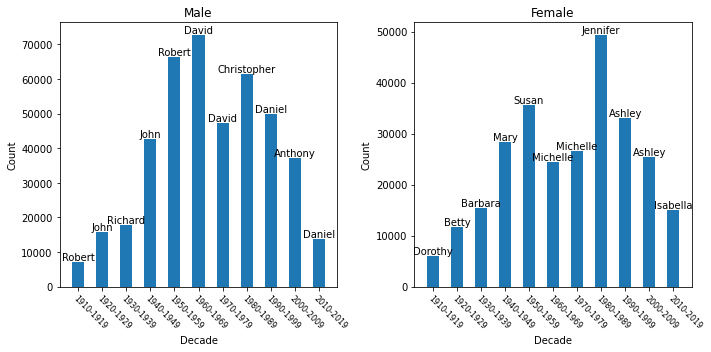

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))

data = (male_second_most_common, female_second_most_common)
titles = ('Male', 'Female')
for ax, datum, title  in zip(axis, data, titles):
  visualize_count_by_decade(ax, datum, title, 'Decade', 'Count')

plt.tight_layout()
plt.show()

# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer the following questions:

## Preperations:

In [ ]:
! pip install kaggle 
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
# download the dataset
! kaggle datasets download rombikuboktaeder/choco-flavors
! unzip /content/choco-flavors.zip

  0% 0.00/30.3k [00:00<?, ?B/s]
100% 30.3k/30.3k [00:00<00:00, 26.5MB/s]
Archive:  /content/choco-flavors.zip
  inflating: flavors_of_cacao.csv    


In [ ]:
# IMPORTS
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import time
from typing import List, Tuple, Dict

In [ ]:
def df_to_db(df: pd.DataFrame, db_name: str, table_name: str, batch_size: int = 0):
  conn = sql.connect(db_name)
  if batch_size:
    df.to_sql(table_name, conn, if_exists='replace', chunksize=batch_size)
  else:
    df.to_sql(table_name, conn, if_exists='replace')
  conn.close()

In [ ]:
db_name = 'CacaoDB.db'
table_name = 'cacao'
flavors_of_cacao_df = pd.read_csv('flavors_of_cacao.csv')

df_to_db(flavors_of_cacao_df, db_name, table_name)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
conn = sql.connect(db_name)
db_cursor = conn.cursor()
db_cursor.execute(f'PRAGMA table_info({table_name})').fetchall()

[(0, 'index', 'INTEGER', 0, None, 0),
 (1, 'Company\xa0\n(Maker-if known)', 'TEXT', 0, None, 0),
 (2, 'Specific Bean Origin\nor Bar Name', 'TEXT', 0, None, 0),
 (3, 'REF', 'INTEGER', 0, None, 0),
 (4, 'Review\nDate', 'INTEGER', 0, None, 0),
 (5, 'Cocoa\nPercent', 'TEXT', 0, None, 0),
 (6, 'Company\nLocation', 'TEXT', 0, None, 0),
 (7, 'Rating', 'REAL', 0, None, 0),
 (8, 'Bean\nType', 'TEXT', 0, None, 0),
 (9, 'Broad Bean\nOrigin', 'TEXT', 0, None, 0)]

**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Fiji' (15pt)

**Question 2:** Write a function that returns the maximal and average cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the minimal and average cocoa percentage in bars manufactured by a Swiss company (15pt).

## Answer:

**Question 3:** Calculate the second most common bean type(s) and the most rare bean type(s) (15
pt)

In [ ]:
def calc_bean_type_2nd_and_rarest(db_cursor, name_of_table:str):
  query_as_str = f"""
  SELECT Count("Bean\nType"), "Bean\nType"
  FROM {name_of_table}
  GROUP BY "Bean\nType"
  ORDER BY Count("Bean\nType") DESC
  """
  
  query_ans = db_cursor.execute(query_as_str).fetchall()
  second_most_common_bean_type_name, second_most_common_bean_type_instances = query_ans[1][1], query_ans[1][0]
  rarest_bean_type_name, rarest_bean_type_instances = query_ans[-2][1], query_ans[-2][0] # as the "rarest" one is None value 
  return second_most_common_bean_type_name, rarest_bean_type_name

In [ ]:
conn = sql.connect(db_name)
db_cursor = conn.cursor()
second_most_common_bean_type, rarest_bean_type = calc_bean_type_2nd_and_rarest(db_cursor, table_name)
conn.close()
print(f'2nd most common bean type: {second_most_common_bean_type}. Rarest_bean_types: {rarest_bean_type}')

2nd most common bean type: Trinitario. Rarest_bean_types: Trinitario, TCGA


**Question 4:** Calculate the number of reviews and the average rating in each year. Calculate the number of reviews and the average rating of each company in each year (15pt)

# 3. Kickstarter Projects Dataset (25pt)

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

## Preperations:


In [ ]:
! pip install kaggle 
! pip install pony
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
# download the dataset
! kaggle datasets download kemical/kickstarter-projects
! unzip kickstarter-projects.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 90% 33.0M/36.8M [00:01<00:00, 17.8MB/s]
100% 36.8M/36.8M [00:01<00:00, 24.6MB/s]
Archive:  kickstarter-projects.zip
  inflating: ks-projects-201612.csv  
  inflating: ks-projects-201801.csv  


In [ ]:
# IMPORTS
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import time, datetime
from typing import List, Tuple, Dict
from pony.orm import *

## Answer:

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [ ]:
# class ks_project declaration

db = Database()
db.bind(provider='sqlite', filename='/content/ks_projectsDB.db', create_db=True)

set_sql_debug(True) 

class KsProject(db.Entity):
  project_id = PrimaryKey(int) 
  project_name = Optional(str, default='NONAME')
  project_category = Required(str)
  project_main_category = Required(str)
  project_currency = Required(str)
  project_deadline = Required(datetime.datetime)
  project_goal = Required(float)
  project_launched = Required(datetime.datetime)
  project_pledged = Required(float)
  project_state = Required(str)
  project_backers = Required(int)
  project_country = Required(str)
  project_usd_pledged = Optional(float, default=0)
  project_usd_pledged_real = Required(float)
  project_usd_goal_real = Required(float)

db.generate_mapping(create_tables=True)

GET NEW CONNECTION
RELEASE CONNECTION
GET CONNECTION FROM THE LOCAL POOL
PRAGMA foreign_keys = false
BEGIN IMMEDIATE TRANSACTION
CREATE TABLE "KsProject" (
  "project_id" INTEGER NOT NULL PRIMARY KEY,
  "project_name" TEXT NOT NULL,
  "project_category" TEXT NOT NULL,
  "project_main_category" TEXT NOT NULL,
  "project_currency" TEXT NOT NULL,
  "project_deadline" DATETIME NOT NULL,
  "project_goal" REAL NOT NULL,
  "project_launched" DATETIME NOT NULL,
  "project_pledged" REAL NOT NULL,
  "project_state" TEXT NOT NULL,
  "project_backers" INTEGER NOT NULL,
  "project_country" TEXT NOT NULL,
  "project_usd_pledged" REAL,
  "project_usd_pledged_real" REAL NOT NULL,
  "project_usd_goal_real" REAL NOT NULL
)

SELECT "KsProject"."project_id", "KsProject"."project_name", "KsProject"."project_category", "KsProject"."project_main_category", "KsProject"."project_currency", "KsProject"."project_deadline", "KsProject"."project_goal", "KsProject"."project_launched", "KsProject"."project_pledged",

In [ ]:
ks_df = pd.read_csv('ks-projects-201801.csv')
ks_df['deadline'] = ks_df['deadline'].astype('datetime64[ns]')
ks_df['launched'] = ks_df['launched'].astype('datetime64[ns]')

set_sql_debug(False)

for idx, row in ks_df.iterrows():
  KsProject(
      project_id = row['ID'],
      project_name = str(row['name']),
      project_category = row['category'],
      project_main_category = row['main_category'],
      project_currency = row['currency'],
      project_deadline = row['deadline'],
      project_goal = row['goal'],
      project_launched = row['launched'],
      project_pledged = row['pledged'],
      project_state = row['state'],
      project_backers = row['backers'],
      project_country = row['country'],
      project_usd_pledged = row['usd pledged'],
      project_usd_pledged_real = row['usd_pledged_real'],
      project_usd_goal_real = row['usd_goal_real']
  )
commit()

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "307963538"
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 3


**Question 1:** On average which project category received the highest number of backers? (15 pt)

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month occurred the highest number of projects? (15 pt)

In [ ]:
months_indices = [month_idx for month_idx in range(1, 13, 1)]
projects_amount_by_month = {}
for month_idx in months_indices:
  query = list(group_concat(project for project in KsProject if project.project_launched.month == month_idx))
  projects_amount_by_month[month_idx] = len(query)

index_of_prevelant_month = max(projects_amount_by_month, key=projects_amount_by_month.get)
name_of_prevelant_month = datetime.datetime(2000, index_of_prevelant_month, 1).strftime("%B")
print(f'month with highest number of new projects is: {name_of_prevelant_month} | with {projects_amount_by_month[index_of_prevelant_month]}# projects')

month with highest number of new projects is: July | with 381264# projects


# 4. Oscars Datasets (10pt)

## Preperations

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

In [ ]:
! pip install kaggle 
! pip install pony
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
# download the dataset
! kaggle datasets download theacademy/academy-awards
! unzip academy-awards.zip
! mv 'database.csv' 'academy_awards.csv'

     |████████████████████████████████| 290 kB 5.0 MB/s 
  Created wheel for pony: filename=pony-0.7.14-py3-none-any.whl size=351293 sha256=5f5fa2cd98399dab489c0401fb1bc8353454975e53329162e89ad09cf965ef7d
  Stored in directory: /root/.cache/pip/wheels/de/7a/8b/82a3b5a0135fc6bad188f62e1bf6c4843142bc22c144879014
Successfully built pony
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 68.9MB/s]
Archive:  academy-awards.zip
  inflating: database.csv            


In [ ]:
# IMPORTS
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import time, datetime
from typing import List, Tuple, Dict
from pony.orm import *

In [ ]:
# examining the dataframe for problematic value
df = pd.read_csv('academy_awards.csv')
print(df.isna().any())
print(df.dtypes)
df.head(10)

Year        False
Ceremony    False
Award       False
Winner       True
Name        False
Film         True
dtype: bool
Year         object
Ceremony      int64
Award        object
Winner      float64
Name         object
Film         object
dtype: object


,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson
5,1927/1928,1,Art Direction,NaN,Rochus Gliese,Sunrise
6,1927/1928,1,Art Direction,1.0,William Cameron Menzies,The Dove; Tempest
7,1927/1928,1,Art Direction,NaN,Harry Oliver,7th Heaven
8,1927/1928,1,Cinematography,NaN,George Barnes,The Devil Dancer; The Magic Flame; Sadie Thompson
9,1927/1928,1,Cinematography,1.0,Charles Rosher,Sunrise


In [ ]:
def df_to_db(df: pd.DataFrame, db_name: str, table_name: str, batch_size: int = 0):
  conn = sql.connect(db_name)
  if batch_size:
    df.to_sql(table_name, conn, if_exists='replace', chunksize=batch_size)
  else:
    df.to_sql(table_name, conn, if_exists='replace')
  conn.close()

In [ ]:
csv_path_to_df = 'academy_awards.csv'
db_name = 'Oscars.db'
table_name = 'oscars_table'
oscars_df = pd.read_csv(csv_path_to_df)

df_to_db(oscars_df, db_name, table_name)

**Question 1:** Who is the male actress with the most Oscar nominees? (10pt)

**Question 2:** Who is the female director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

## Answer to Q3:

In [ ]:
conn = sql.connect(db_name)
db_cursor = conn.cursor()
query = f"""
        SELECT Count(Film), Film
        FROM {table_name}
        GROUP BY Film
        ORDER BY Count(Film) DESC
        """
# query_params = (,)
all_movies_nominees_count = db_cursor.execute(query).fetchall()#, query_params)
top_movies_nominees = all_movies_nominees_count[:10]
conn.close()
for idx, movie_nominee in enumerate(top_movies_nominees):
  print(f"{idx+1}{'st' if idx==0 else 'nd' if idx==1 else 'th'} place: {movie_nominee[1]} with {movie_nominee[0]}# nominees")


1st place: Metro-Goldwyn-Mayer with 60# nominees
2nd place: Walt Disney, Producer with 57# nominees
3th place: John Williams with 42# nominees
4th place: Warner Brothers with 42# nominees
5th place: France with 36# nominees
6th place: Alfred Newman with 34# nominees
7th place: Italy with 27# nominees
8th place: Paramount with 24# nominees
9th place: Edith Head with 22# nominees
10th place: Gordon Hollingshead, Producer with 22# nominees


**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

## 5. Select a Dataset (15pt)

**Open Question:** Select an interesting dataset and use SQL to discover something interesting (15pt). **Bonus:** Use BigQuery (2pt)

## Preperations:
### Dataset: HR analytics of data scientists' job positions and hires.

In [ ]:
! pip install kaggle 
! pip install pony
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
# download the dataset
! kaggle datasets download arashnic/hr-analytics-job-change-of-data-scientists
! unzip hr-analytics-job-change-of-data-scientists.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
hr-analytics-job-change-of-data-scientists.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  hr-analytics-job-change-of-data-scientists.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [ ]:
! export GOOGLE_APPLICATION_CREDENTIALS="bigquerytryouts-ff22569e5dad.json"

In [ ]:
df = pd.read_csv('aug_train.csv')
df.dropna(inplace=True)
print(df.dtypes)
df.head()
# df.hist()

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [ ]:
def df_to_db(df: pd.DataFrame, db_name: str, table_name: str, batch_size: int = 0):
  conn = sql.connect(db_name)
  if batch_size:
    df.to_sql(table_name, conn, if_exists='replace', chunksize=batch_size)
  else:
    df.to_sql(table_name, conn, if_exists='replace')
  conn.close()

In [ ]:
csv_path_to_df = 'aug_train.csv'
db_name = 'HrAnalyticsDB.db'
table_name = 'hr_analytics_table'
hr_analytics_df = pd.read_csv(csv_path_to_df)
hr_analytics_df.dropna(inplace=True)

df_to_db(hr_analytics_df, db_name, table_name)

## Answer:

I decided to examine the fraction of job applicants with no prior experience which got chosen for the job. To see whether the level of education and gender of the applicants is a contributing factor, I grouped the results by both properties and plotted the results.

Interestingly B.Sc. graduates are more likely to get a job with no experience compared to Masters and Ph.D graduates. 
Further more, male doctorates are far more likely to get accepted than women applicants with similar education. 

In [ ]:
conn = sql.connect(db_name)
db_cursor = conn.cursor()

query = f"""
SELECT  education_level, gender, Sum(target), Count(target)
FROM {table_name}
WHERE relevent_experience=? 
GROUP BY education_level, gender
"""
query_params = ('No relevent experience',)

query_results = db_cursor.execute(query, query_params).fetchall()

male_acceptance = {f'{item[0]}': item[2]/item[3] for item in query_results if item[1]=='Male'}
female_acceptance = {f'{item[0]}': item[2]/item[3] for item in query_results if item[1]=='Female'}
other_acceptance = {f'{item[0]}': item[2]/item[3] for item in query_results if item[1]=='Other'}

conn.close()

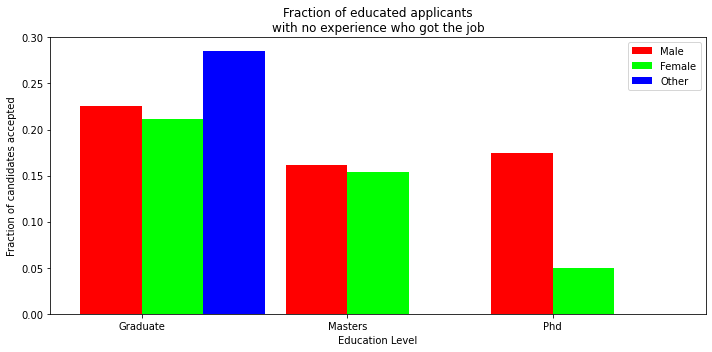

In [ ]:
other_acceptance['Phd'] = 0

fig, ax = plt.subplots(figsize=(10, 5))

x_axis = np.array([0,1,2])
x_axis_labels = list(female_acceptance.keys())

width = 0.3
ax.bar(x_axis, list(male_acceptance.values()), 0.3, color=(1,0,0,1), label='Male')
ax.bar(x_axis+width, list(female_acceptance.values()), 0.3, color=(0,1,0,1), label='Female')
ax.bar(x_axis+width*2, list(other_acceptance.values()), 0.3, color=(0,0,1,1), label='Other')

ax.set_ylabel('Fraction of candidates accepted')
ax.set_xlabel('Education Level')
ax.set_title('Fraction of educated applicants\nwith no experience who got the job') 
ax.set_xticks(x_axis + width / 2)
ax.set_xticklabels(x_axis_labels)

plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
other_acceptance

{'Graduate': 0.2857142857142857, 'Masters': 0.0, 'Phd': 0}